In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="whitegrid", color_codes=True)
pd.set_option('display.max_columns', None)

In [2]:
import warnings
warnings.filterwarnings("ignore")
import scipy as sp
from scipy import stats
import math
import random
import statistics as st
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
random.seed = 42


In [3]:
data=pd.read_excel('C:\\Users\\Shravya\\Downloads\\train.xlsx')
data.shape

(3998, 38)

In [4]:
data

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.30,"board ofsecondary education,ap",2007,95.80,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.40,cbse,2007,85.00,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.00,cbse,2010,68.20,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.60,cbse,2007,83.60,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.00,cbse,2008,76.80,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,47916,280000,2011-10-01,2012-10-01 00:00:00,software engineer,New Delhi,m,1987-04-15,52.09,cbse,2006,55.50,cbse,6268,2,B.Tech/B.E.,information technology,61.50,6268,0,Haryana,2010,365,334,475,0.276047,345,-1,-1,-1,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,752781,100000,2013-07-01,2013-07-01 00:00:00,technical writer,Hyderabad,f,1992-08-27,90.00,state board,2009,93.00,state board,4883,2,B.Tech/B.E.,electronics and communication engineering,77.30,4883,1,Telangana,2013,415,410,535,0.881620,325,420,-1,-1,-1,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,355888,320000,2013-07-01,present,associate software engineer,Bangalore,m,1991-07-03,81.86,"bse,odisha",2008,65.50,"chse,odisha",9786,2,B.Tech/B.E.,computer engineering,70.00,9786,0,Orissa,2012,475,475,465,0.488348,405,-1,-1,-1,-1,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,947111,200000,2014-07-01,2015-01-01 00:00:00,software developer,Asifabadbanglore,f,1992-03-20,78.72,state board,2010,69.88,state board,979,2,B.Tech/B.E.,computer science & engineering,70.42,979,1,Karnataka,2014,450,410,320,0.744758,445,-1,438,-1,-1,-1,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943


In [5]:
data.columns

Index(['ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeID', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

In [6]:
data.describe()

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3.998000e+03,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,6.637945e+05,3.076998e+05,77.925443,2008.087544,74.466366,5156.851426,1.925713,71.486171,5156.851426,0.300400,2012.105803,501.649075,501.598799,513.378189,0.510490,353.102801,95.328414,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,3.632182e+05,2.127375e+05,9.850162,1.653599,10.999933,4802.261482,0.262270,8.167338,4802.261482,0.458489,31.857271,104.940021,86.783297,122.302332,0.468671,205.355519,158.241218,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075
min,1.124400e+04,3.500000e+04,43.000000,1995.000000,40.000000,2.000000,1.000000,6.450000,2.000000,0.000000,0.000000,180.000000,195.000000,120.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,3.342842e+05,1.800000e+05,71.680000,2007.000000,66.000000,494.000000,2.000000,66.407500,494.000000,0.000000,2012.000000,425.000000,445.000000,430.000000,0.342315,295.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,6.396000e+05,3.000000e+05,79.150000,2008.000000,74.400000,3879.000000,2.000000,71.720000,3879.000000,0.000000,2013.000000,500.000000,505.000000,515.000000,0.622643,415.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,9.904800e+05,3.700000e+05,85.670000,2009.000000,82.600000,8818.000000,2.000000,76.327500,8818.000000,1.000000,2014.000000,570.000000,565.000000,595.000000,0.842248,495.000000,233.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,1.298275e+06,4.000000e+06,97.760000,2013.000000,98.700000,18409.000000,2.000000,99.930000,18409.000000,1.000000,2017.000000,875.000000,795.000000,900.000000,0.999910,840.000000,612.000000,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400


## dropping the ID's


In [7]:
data.drop(columns=['ID','CollegeID','CollegeCityID'],inplace=True)

In [8]:
data.columns

Index(['Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityTier', 'CollegeState', 'GraduationYear', 'English',
       'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

## converting column names to lower

In [9]:
data.columns=data.columns.str.lower()

In [10]:
data.dtypes

salary                            int64
doj                      datetime64[ns]
dol                              object
designation                      object
jobcity                          object
gender                           object
dob                      datetime64[ns]
10percentage                    float64
10board                          object
12graduation                      int64
12percentage                    float64
12board                          object
collegetier                       int64
degree                           object
specialization                   object
collegegpa                      float64
collegecitytier                   int64
collegestate                     object
graduationyear                    int64
english                           int64
logical                           int64
quant                             int64
domain                          float64
computerprogramming               int64
electronicsandsemicon             int64


## DOL- date of leaving.This is data of 2015 so lets assume that the people who are present at that time are left within 2015 only. by replacing prersent with 31-12-2015. Then convert to date time format

In [11]:
data['dol'].replace('present','2015-12-31',inplace=True)
data['dol']=pd.to_datetime(data['dol'])

In [12]:
data

,salary,doj,dol,designation,jobcity,gender,dob,10percentage,10board,12graduation,12percentage,12board,collegetier,degree,specialization,collegegpa,collegecitytier,collegestate,graduationyear,english,logical,quant,domain,computerprogramming,electronicsandsemicon,computerscience,mechanicalengg,electricalengg,telecomengg,civilengg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000,2012-06-01,2015-12-31,senior quality engineer,Bangalore,f,1990-02-19,84.30,"board ofsecondary education,ap",2007,95.80,"board of intermediate education,ap",2,B.Tech/B.E.,computer engineering,78.00,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000,2013-09-01,2015-12-31,assistant manager,Indore,m,1989-10-04,85.40,cbse,2007,85.00,cbse,2,B.Tech/B.E.,electronics and communication engineering,70.06,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000,2014-06-01,2015-12-31,systems engineer,Chennai,f,1992-08-03,85.00,cbse,2010,68.20,cbse,2,B.Tech/B.E.,information technology,70.00,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,1100000,2011-07-01,2015-12-31,senior software engineer,Gurgaon,m,1989-12-05,85.60,cbse,2007,83.60,cbse,1,B.Tech/B.E.,computer engineering,74.64,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,200000,2014-03-01,2015-03-01,get,Manesar,m,1991-02-27,78.00,cbse,2008,76.80,cbse,2,B.Tech/B.E.,electronics and communication engineering,73.90,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,280000,2011-10-01,2012-10-01,software engineer,New Delhi,m,1987-04-15,52.09,cbse,2006,55.50,cbse,2,B.Tech/B.E.,information technology,61.50,0,Haryana,2010,365,334,475,0.276047,345,-1,-1,-1,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,100000,2013-07-01,2013-07-01,technical writer,Hyderabad,f,1992-08-27,90.00,state board,2009,93.00,state board,2,B.Tech/B.E.,electronics and communication engineering,77.30,1,Telangana,2013,415,410,535,0.881620,325,420,-1,-1,-1,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,320000,2013-07-01,2015-12-31,associate software engineer,Bangalore,m,1991-07-03,81.86,"bse,odisha",2008,65.50,"chse,odisha",2,B.Tech/B.E.,computer engineering,70.00,0,Orissa,2012,475,475,465,0.488348,405,-1,-1,-1,-1,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,200000,2014-07-01,2015-01-01,software developer,Asifabadbanglore,f,1992-03-20,78.72,state board,2010,69.88,state board,2,B.Tech/B.E.,computer science & engineering,70.42,1,Karnataka,2014,450,410,320,0.744758,445,-1,438,-1,-1,-1,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943


In [13]:
data.columns

Index(['salary', 'doj', 'dol', 'designation', 'jobcity', 'gender', 'dob',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'collegetier', 'degree', 'specialization', 'collegegpa',
       'collegecitytier', 'collegestate', 'graduationyear', 'english',
       'logical', 'quant', 'domain', 'computerprogramming',
       'electronicsandsemicon', 'computerscience', 'mechanicalengg',
       'electricalengg', 'telecomengg', 'civilengg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

## data type conversion of categorical values to type category  for easy understanding

In [14]:
categorical=['designation','jobcity','gender','10board','12board','degree','collegetier','specialization','collegecitytier','collegestate']
for cat in categorical:
    data[cat]=data[cat].astype('category')


In [15]:
data.dtypes

salary                            int64
doj                      datetime64[ns]
dol                      datetime64[ns]
designation                    category
jobcity                        category
gender                         category
dob                      datetime64[ns]
10percentage                    float64
10board                        category
12graduation                      int64
12percentage                    float64
12board                        category
collegetier                    category
degree                         category
specialization                 category
collegegpa                      float64
collegecitytier                category
collegestate                   category
graduationyear                    int64
english                           int64
logical                           int64
quant                             int64
domain                          float64
computerprogramming               int64
electronicsandsemicon             int64


In [16]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
salary,3998.0,307699.849925,212737.499957,35000.0000,180000.000000,300000.000000,370000.000000,4.000000e+06
10percentage,3998.0,77.925443,9.850162,43.0000,71.680000,79.150000,85.670000,9.776000e+01
12graduation,3998.0,2008.087544,1.653599,1995.0000,2007.000000,2008.000000,2009.000000,2.013000e+03
12percentage,3998.0,74.466366,10.999933,40.0000,66.000000,74.400000,82.600000,9.870000e+01
collegegpa,3998.0,71.486171,8.167338,6.4500,66.407500,71.720000,76.327500,9.993000e+01
graduationyear,3998.0,2012.105803,31.857271,0.0000,2012.000000,2013.000000,2014.000000,2.017000e+03
english,3998.0,501.649075,104.940021,180.0000,425.000000,500.000000,570.000000,8.750000e+02
logical,3998.0,501.598799,86.783297,195.0000,445.000000,505.000000,565.000000,7.950000e+02
quant,3998.0,513.378189,122.302332,120.0000,430.000000,515.000000,595.000000,9.000000e+02
domain,3998.0,0.510490,0.468671,-1.0000,0.342315,0.622643,0.842248,9.999104e-01


## data preprocessing

## check DOL & DOJ

In [17]:
LJ= data[~(data['dol']>data['doj'])].shape[0]
print(f'dol is greater than doj for {LJ} observations.')

dol is greater than doj for 55 observations.


In [18]:
data=data.drop(data[~(data['dol'] > data['doj'])].index)## 55 rows  deleted from dol

## Gender column more descriptive 

In [19]:
data['gender'].replace({'f':'Female','m':'Male'},inplace=True)
data.head()

,salary,doj,dol,designation,jobcity,gender,dob,10percentage,10board,12graduation,12percentage,12board,collegetier,degree,specialization,collegegpa,collegecitytier,collegestate,graduationyear,english,logical,quant,domain,computerprogramming,electronicsandsemicon,computerscience,mechanicalengg,electricalengg,telecomengg,civilengg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000,2012-06-01,2015-12-31,senior quality engineer,Bangalore,Female,1990-02-19,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",2,B.Tech/B.E.,computer engineering,78.00,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000,2013-09-01,2015-12-31,assistant manager,Indore,Male,1989-10-04,85.4,cbse,2007,85.0,cbse,2,B.Tech/B.E.,electronics and communication engineering,70.06,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000,2014-06-01,2015-12-31,systems engineer,Chennai,Female,1992-08-03,85.0,cbse,2010,68.2,cbse,2,B.Tech/B.E.,information technology,70.00,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,1100000,2011-07-01,2015-12-31,senior software engineer,Gurgaon,Male,1989-12-05,85.6,cbse,2007,83.6,cbse,1,B.Tech/B.E.,computer engineering,74.64,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,200000,2014-03-01,2015-03-01,get,Manesar,Male,1991-02-27,78.0,cbse,2008,76.8,cbse,2,B.Tech/B.E.,electronics and communication engineering,73.90,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


## bringing cgpa 0 to 100 scale

In [20]:
(data.loc[data['collegegpa']<=10,'collegegpa']/10)*100


7       85.8
138     66.3
788     68.0
1419    68.5
1439    80.7
1767    75.6
2151    69.5
2229    81.3
2293    93.0
2662    88.8
2691    88.9
3308    64.5
Name: collegegpa, dtype: float64

## checking any o and -1 values in columns

In [21]:
print((data==0).sum() [(data==0).sum()>0])

10board             349
12board             358
collegecitytier    2761
graduationyear        1
dtype: int64


In [22]:

(data==-1).sum()[(data==-1).sum()>0]/len(data)*100


jobcity                  11.361907
domain                    6.137459
computerprogramming      21.836165
electronicsandsemicon    71.392341
computerscience          77.605884
mechanicalengg           94.040071
electricalengg           96.094344
telecomengg              90.565559
civilengg                98.934821
dtype: float64

## The above columns cannot have zeros or -1 as their inputs and hence they should be considered as null values and therefore imputed

## he below columns have large number of -1(null values). Hence we will be dropping the columns out of analysis in which the percentage for -1 values is greater than or equalto 80% and for the rest of them, we will impute the values as zero.

In [23]:
data.drop(columns=['mechanicalengg','electricalengg','telecomengg','civilengg'],inplace=True)

In [24]:
data['10board'] = data['10board'].replace({0:np.nan})
data['12board'] = data['12board'].replace({0:np.nan})
data['graduationyear'] = data['graduationyear'].replace({0:np.nan})
data['jobcity'] = data['jobcity'].replace({-1:np.nan})
data['domain'] = data['domain'].replace({-1:np.nan})
data['electronicsandsemicon'] = data['electronicsandsemicon'].replace({-1:0})
data['computerscience'] = data['computerscience'].replace({-1:0})
data['computerprogramming'] = data['computerprogramming'].replace({-1:np.nan})

## impute missing values with zero

## • For numerical variables, impute missing values with Mean or Median
## • For categorical variables, impute missing values with Mode

## imputing categorical columns with mode values

In [25]:
data['10board'].fillna(data['10board'].mode()[0], inplace = True)
data['12board'].fillna(data['12board'].mode()[0], inplace = True)
data['graduationyear'].fillna(data['graduationyear'].mode()[0], inplace = True)
data['jobcity'].fillna(data['jobcity'].mode()[0], inplace = True)

In [26]:
data['domain'].fillna(data['domain'].median(), inplace = True)
data['computerprogramming'].fillna(data['computerprogramming'].median(), inplace=True)

In [27]:
data.head()

,salary,doj,dol,designation,jobcity,gender,dob,10percentage,10board,12graduation,12percentage,12board,collegetier,degree,specialization,collegegpa,collegecitytier,collegestate,graduationyear,english,logical,quant,domain,computerprogramming,electronicsandsemicon,computerscience,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000,2012-06-01,2015-12-31,senior quality engineer,Bangalore,Female,1990-02-19,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",2,B.Tech/B.E.,computer engineering,78.00,0,Andhra Pradesh,2011.0,515,585,525,0.635979,445.0,0,0,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000,2013-09-01,2015-12-31,assistant manager,Indore,Male,1989-10-04,85.4,cbse,2007,85.0,cbse,2,B.Tech/B.E.,electronics and communication engineering,70.06,0,Madhya Pradesh,2012.0,695,610,780,0.960603,455.0,466,0,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000,2014-06-01,2015-12-31,systems engineer,Chennai,Female,1992-08-03,85.0,cbse,2010,68.2,cbse,2,B.Tech/B.E.,information technology,70.00,0,Uttar Pradesh,2014.0,615,545,370,0.450877,395.0,0,0,0.2718,1.7109,0.1637,-0.86820,0.6721
3,1100000,2011-07-01,2015-12-31,senior software engineer,Gurgaon,Male,1989-12-05,85.6,cbse,2007,83.6,cbse,1,B.Tech/B.E.,computer engineering,74.64,1,Delhi,2011.0,635,585,625,0.974396,615.0,0,0,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,200000,2014-03-01,2015-03-01,get,Manesar,Male,1991-02-27,78.0,cbse,2008,76.8,cbse,2,B.Tech/B.E.,electronics and communication engineering,73.90,0,Uttar Pradesh,2012.0,545,625,465,0.124502,455.0,233,0,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [28]:
data['12board'].unique()

['board of intermediate education,ap', 'cbse', 'state board', 'mp board', 'isc', ..., 'scte & vt (diploma)', 'karnataka pu', 'board of intmediate education ap', 'up-board', 'boardofintermediate']
Length: 339
Categories (339, object): ['board of intermediate education,ap', 'cbse', 'state board', 'mp board', ..., 'karnataka pu', 'board of intmediate education ap', 'up-board', 'boardofintermediate']

In [29]:
replace_list_state=['board of intermediate education,ap', 'state board',
       'mp board',  'karnataka pre university board', 'up',
       'p u board, karnataka', 'dept of pre-university education', 'bie',
       'kerala state hse board', 'up board', 'bseb', 'chse', 'puc',
       ' upboard',
       'state  board of intermediate education, andhra pradesh',
       'karnataka state board',
       'west bengal state council of technical education', 'wbchse',
       'maharashtra state board', 'ssc',
       'sda matric higher secondary school', 'uttar pradesh board', 'ibe',
       'chsc', 'board of intermediate', 'upboard', 'sbtet',
       'hisher seconadry examination(state board)', 'pre university',
       'borad of intermediate', 'j & k board',
       'intermediate board of andhra pardesh', 'rbse',
       'central board of secondary education', 'jkbose', 'hbse',
       'board of intermediate education', 'state', 'ms board', 'pue',
       'intermediate state board', 'stateboard', 'hsc',
       'electonincs and communication(dote)', 'karnataka pu board',
       'government polytechnic mumbai , mumbai board', 'pu board',
       'baord of intermediate education', 'apbie', 'andhra board',
       'tamilnadu stateboard',
       'west bengal council of higher secondary education',
       'cbse,new delhi', 'u p board', 'intermediate', 'biec,patna',
       'diploma in engg (e &tc) tilak maharashtra vidayapeeth',
       'hsc pune', 'pu board karnataka', 'kerala', 'gsheb',
       'up(allahabad)', 'nagpur', 'st joseph hr sec school',
       'pre university board', 'ipe', 'maharashtra', 'kea', 'apsb',
       'himachal pradesh board of school education', 'staae board',
       'international baccalaureate (ib) diploma', 'nios',
       'karnataka board of university',
       'board of secondary education rajasthan', 'uttarakhand board',
       'ua', 'scte vt orissa', 'matriculation',
       'department of pre-university education', 'wbscte',
       'preuniversity board(karnataka)', 'jharkhand accademic council',
       'bieap', 'msbte (diploma in computer technology)',
       'jharkhand acamedic council (ranchi)',
       'department of pre-university eduction', 'biec',
       'sjrcw', ' board of intermediate', 'msbte',
       'sri sankara vidyalaya', 'chse, odisha', 'bihar board',
       'maharashtra state(latur board)', 'rajasthan board', 'mpboard',
       'state board of technical eduction panchkula', 'upbhsie', 'apbsc',
       'state board of technical education and training',
       'secondary board of rajasthan',
       'tamilnadu higher secondary education board',
       'jharkhand academic council',
       'board of intermediate education,hyderabad', 'up baord', 'pu',
       'dte', 'board of secondary education', 'pre-university',
       'board of intermediate education,andhra pradesh',
       'up board , allahabad', 'srv girls higher sec school,rasipuram',
       'intermediate board of education,andhra pradesh',
       'intermediate board examination',
       'department of pre-university education, bangalore',
       'stmiras college for girls', 'mbose',
       'department of pre-university education(government of karnataka)',
       'dpue', 'msbte pune', 'board of school education harayana',
       'sbte, jharkhand', 'bihar intermediate education council, patna',
       'higher secondary', 's j polytechnic', 'latur',
       'board of secondary education, rajasthan', 'jyoti nivas', 'pseb',
       'biec-patna', 'board of intermediate education,andra pradesh',
       'chse,orissa', 'pre-university board', 'mp', 'intermediate board',
       'govt of karnataka department of pre-university education',
       'karnataka education board',
       'board of secondary school of education', 'pu board ,karnataka',
       'karnataka secondary education board', 'karnataka sslc',
       'board of intermediate ap', 'u p', 'state board of karnataka',
       'directorate of technical education,banglore', 'matric board',
       'andhpradesh board of intermediate education',
       'stjoseph of cluny matrhrsecschool,neyveli,cuddalore district',
       'bte up', 'scte and vt ,orissa', 'hbsc',
       'jawahar higher secondary school', 'nagpur board', 'bsemp',
       'board of intermediate education, andhra pradesh',
       'board of higher secondary orissa',
       'board of secondary education,rajasthan(rbse)',
       'board of intermediate education:ap,hyderabad', 'science college',
       'karnatak pu board', 'aissce', 'pre university board of karnataka',
       'bihar', 'kerala state board', 'uo board', 
       'karnataka board', 'tn state board',
       'kolhapur divisional board, maharashtra',
       'jaycee matriculation school',
       'board of higher secondary examination, kerala',
       'uttaranchal state board', 'intermidiate', 'bciec,patna', 'bice',
       'karnataka state', 'state broad', 'wbbhse', 'gseb',
       'uttar pradesh', 'ghseb', 'board of school education uttarakhand',
       'gseb/technical education board', 'msbshse,pune',
       'tamilnadu state board', 'board of technical education',
       'kerala university', 'uttaranchal shiksha avam pariksha parishad',
       'chse(concil of higher secondary education)',
       'bright way college, (up board)', 'board of intermidiate',
       'higher secondary state certificate', 'karanataka secondary board',
       'maharashtra board', 'cgbse', 'diploma in computers', 'bte,delhi',
       'rajasthan board ajmer', 'mpbse', 'pune board',
       'state board of technical education', 'gshseb',
       'amravati divisional board', 'dote (diploma - computer engg)',
       'karnataka pre-university board', 'jharkhand board',
       'punjab state board of technical education & industrial training',
       'department of technical education',
       'sri chaitanya junior kalasala', 'state board (jac, ranchi)',
       'aligarh muslim university', 'tamil nadu state board', 'hse',
       'karnataka secondary education', 'state board ',
       'karnataka pre unversity board',
       'ks rangasamy institute of technology',
       'karnataka board secondary education', 'narayana junior college',
       'bteup', 'board of intermediate(bie)', 'hsc maharashtra board',
       'tamil nadu state', 'uttrakhand board', 'psbte',
       'stateboard/tamil nadu', 'intermediate council patna',
       'technical board, punchkula', 'board of intermidiate examination',
       'sri kannika parameswari highier secondary school, udumalpet',
       'ap board', 'nashik board', 'himachal pradesh board',
       'maharashtra satate board',
       'andhra pradesh board of secondary education',
       'tamil nadu polytechnic',
       'maharashtra state board mumbai divisional board',
       'department of pre university education',
       'dav public school,hehal', 'board of intermediate education, ap',
       'rajasthan board of secondary education',
       'department of technical education, bangalore', 'chse,odisha',
       'maharashtra nasik board',
       'west bengal council of higher secondary examination (wbchse)',
       'holy cross matriculation hr sec school', 'cbsc',
       'pu  board karnataka', 'biec patna', 'kolhapur', 'bseb, patna',
       'up board allahabad', 'nagpur board,nagpur', 'diploma(msbte)',
       'dav public school', 'pre university board, karnataka',
       'ssm srsecschool', 'state bord', 'jstb,jharkhand',
       'intermediate board of education', 'mp board bhopal', 'pub',
       'madhya pradesh board', 'bihar intermediate education council',
       'west bengal council of higher secondary eucation',
        'mpc',
       'certificate for higher secondary education (chse)orissa',
       'maharashtra state board for hsc',
       'board of intermeadiate education', 'latur board',
       'andhra pradesh', 'karnataka pre-university',
       'lucknow public college', 'nagpur divisional board',
       'ap intermediate board', 'cgbse raipur', 'uttranchal board',
       'jiec', 
       'bihar school examination board patna',
       'state board of technical education harayana', 'mp-bse',
       'up bourd', 'dav public school sec 14',
       'haryana state board of technical education chandigarh',
       'council for indian school certificate examination',
       'jaswant modern school', 'madhya pradesh open school',
       'aurangabad board', 'j&k state board of school education',
       'diploma ( maharashtra state board of technical education)',
       'board of technicaleducation ,delhi',
       'maharashtra state boar of secondary and higher secondary education',
       'hslc (tamil nadu state board)',
       'karnataka state examination board', 'puboard', 'nasik',
       'west bengal board of higher secondary education',
       'up board,allahabad', 'board of intrmediate education,ap', 
       'karnataka state pre- university board',
       'state board - west bengal council of higher secondary education : wbchse',
       'maharashtra state board of secondary & higher secondary education',
       'biec, patna', 'state syllabus', 'cbse board', 'scte&vt',
       'board of intermediate,ap',
       'secnior secondary education board of rajasthan',
       'maharashtra board, pune', 'rbse (state board)',
       'board of intermidiate education,ap',
       'board of high school and intermediate education uttarpradesh',
       'higher secondary education',
       'board fo intermediate education, ap', 'intermedite',
       'ap board for intermediate education', 'ahsec',
       'punjab state board of technical education & industrial training, chandigarh',
       'state board - tamilnadu', 'jharkhand acedemic council',
       'scte & vt (diploma)', 'karnataka pu',
       'board of intmediate education ap', 'up-board',
       'boardofintermediate','state', 'cbse', 'icse', 'andhra pradesh state board', 'up bord', 'gujarat board', 'intermideate']


In [30]:
#replacing the redundant values of the 12board column with 'state','cbse','icse' and 'n/a'
for i in replace_list_state:
    data['12board'].replace(i,'state',inplace=True)

replace_list_cbse=['cbse', 
       'all india board', 
       'central board of secondary education, new delhi', 'cbese']
for i in replace_list_cbse:
    data['12board'].replace(i,'cbse',inplace=True)

replace_list_icse=[ 'isc', 'icse', 'isc board', 'isce', 'cicse',
       'isc board , new delhi']
for i in replace_list_icse:
    data['12board'].replace(i,'icse',inplace=True)

data['12board'].replace(0,'n/a',inplace=True)

data['12board'].unique()

['state', 'icse', 'cbse']
Categories (3, object): ['state', 'icse', 'cbse']

In [31]:
data.dtypes

salary                            int64
doj                      datetime64[ns]
dol                      datetime64[ns]
designation                    category
jobcity                        category
gender                           object
dob                      datetime64[ns]
10percentage                    float64
10board                        category
12graduation                      int64
12percentage                    float64
12board                        category
collegetier                    category
degree                         category
specialization                 category
collegegpa                      float64
collegecitytier                category
collegestate                   category
graduationyear                  float64
english                           int64
logical                           int64
quant                             int64
domain                          float64
computerprogramming             float64
electronicsandsemicon             int64


In [32]:
data['degree'].unique()

['B.Tech/B.E.', 'MCA', 'M.Tech./M.E.', 'M.Sc. (Tech.)']
Categories (4, object): ['B.Tech/B.E.', 'MCA', 'M.Tech./M.E.', 'M.Sc. (Tech.)']

In [33]:
specialization_freq = data['specialization'].value_counts()

In [34]:

specialization_map = \
{'electronics and communication engineering' : 'EC',
 'computer science & engineering' : 'CS',
 'information technology' : 'CS' ,
 'computer engineering' : 'CS',
 'computer application' : 'CS',
 'mechanical engineering' : 'ME',
 'electronics and electrical engineering' : 'EC',
 'electronics & telecommunications' : 'EC',
 'electrical engineering' : 'EL',
 'electronics & instrumentation eng' : 'EC',
 'civil engineering' : 'CE',
 'electronics and instrumentation engineering' : 'EC',
 'information science engineering' : 'CS',
 'instrumentation and control engineering' : 'EC',
 'electronics engineering' : 'EC',
 'biotechnology' : 'other',
 'other' : 'other',
 'industrial & production engineering' : 'other',
 'chemical engineering' : 'other',
 'applied electronics and instrumentation' : 'EC',
 'computer science and technology' : 'CS',
 'telecommunication engineering' : 'EC',
 'mechanical and automation' : 'ME',
 'automobile/automotive engineering' : 'ME',
 'instrumentation engineering' : 'EC',
 'mechatronics' : 'ME',
 'electronics and computer engineering' : 'CS',
 'aeronautical engineering' : 'ME',
 'computer science' : 'CS',
 'metallurgical engineering' : 'other',
 'biomedical engineering' : 'other',
 'industrial engineering' : 'other',
 'information & communication technology' : 'EC',
 'electrical and power engineering' : 'EL',
 'industrial & management engineering' : 'other',
 'computer networking' : 'CS',
 'embedded systems technology' : 'EC',
 'power systems and automation' : 'EL',
 'computer and communication engineering' : 'CS',
 'information science' : 'CS',
 'internal combustion engine' : 'ME',
 'ceramic engineering' : 'other',
 'mechanical & production engineering' : 'ME',
 'control and instrumentation engineering' : 'EC',
 'polymer technology' : 'other',
 'electronics' : 'EC'}


In [35]:
data['specialization'] = data['specialization'].map(specialization_map)

print(data['specialization'].unique())

['CS' 'EC' 'ME' 'EL' 'CE' 'other']


In [36]:

data['averageScore']=(data['logical']+data['quant']+data['english'])/3
print(data['averageScore'])


0       541.666667
1       695.000000
2       510.000000
3       615.000000
4       545.000000
           ...    
3992    425.000000
3993    391.333333
3995    471.666667
3996    393.333333
3997    514.666667
Name: averageScore, Length: 3943, dtype: float64


In [37]:
data['acadperf']=data['10percentage']+data['12percentage']+data['collegegpa']/3
print(data['acadperf'])

0       206.100000
1       193.753333
2       176.533333
3       194.080000
4       179.433333
           ...    
3992    153.333333
3993    128.090000
3995    170.693333
3996    172.073333
3997    161.266667
Name: acadperf, Length: 3943, dtype: float64


## univariate analysis

## specialization

<AxesSubplot:>

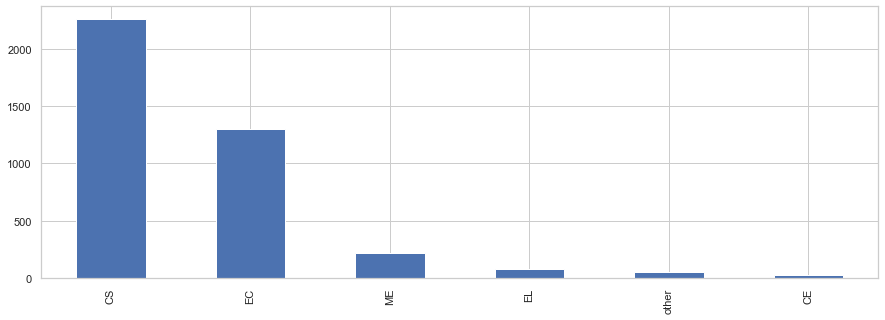

In [38]:
data['specialization'].value_counts().plot(kind='bar', figsize=(15,5))

In [39]:
## computer science is the top most specialization compared to other subjects which is almost above 2000 length. second top is EC with almost 1200. 

## gender

<AxesSubplot:>

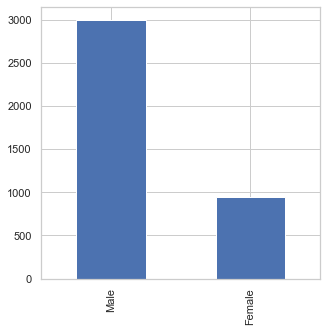

In [40]:
data['gender'].value_counts().plot(kind='bar', figsize=(5,5))
#this is a bar plot of the gender category 
#m=Male f=Female

In [41]:
## comparitively male are highest in count than female . this bar plot represents how gender is proportional to values

## designation

software engineer          535
software developer         262
system engineer            202
programmer analyst         139
systems engineer           117
                          ... 
recruitment associate        1
recruitment coordinator      1
risk investigator            0
software devloper            0
staffing recruiter           0
Name: designation, Length: 419, dtype: int64


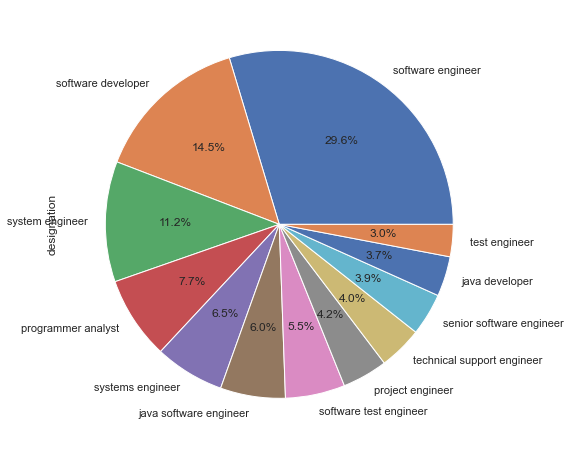

In [42]:
print(data['designation'].value_counts())    
plt.figure(figsize=(8,8))
data.designation.value_counts().iloc[:12].plot(kind='pie', autopct='%1.1f%%')
plt.show()                   

In [43]:
## pie chart showing the first 12 designations with how much percent they are in demand.

##  12board

<AxesSubplot:xlabel='12board', ylabel='count'>

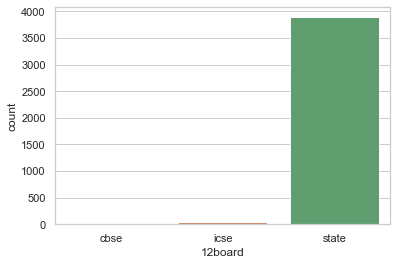

In [44]:
sns.countplot(x='12board',data=data)

In [45]:
## count of observations in state bin is highest campared to icse and cbse.next icse is in second position according to above plot. From this state board is being widely used by all the states for 12board

## degree

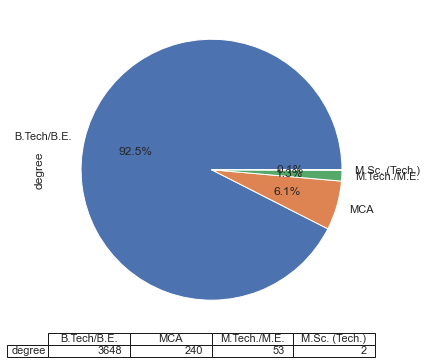

In [46]:
plt.figure(figsize=(6,6))
data.degree.value_counts().plot(kind='pie', autopct='%1.1f%%', table = True)
plt.show()

In [47]:
## from above pie chart it is clear that btech is around 92.5% which is highest among all degree's now a days.most popular is b tech.

## college tier

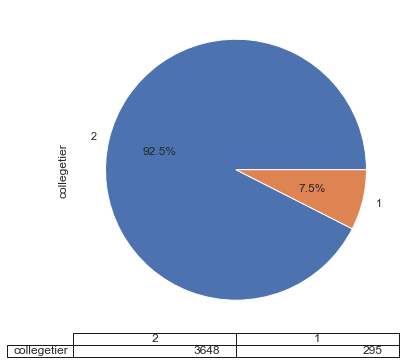

In [48]:
plt.figure(figsize=(6,6))
data.collegetier.value_counts().plot(kind='pie', autopct='%1.1f%%', table = True)
plt.show()

In [49]:
## it is clear that tier 1 college are of 7.5% and tier 2 colleges are of 92.5%.

## college city tier

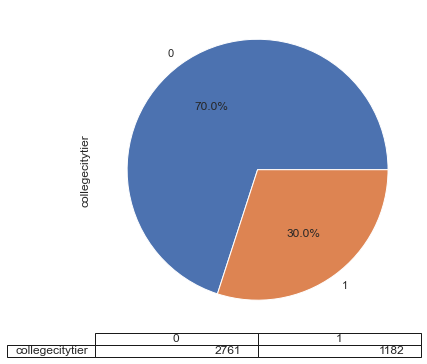

In [50]:
plt.figure(figsize=(6,6))
data.collegecitytier.value_counts().plot(kind='pie', autopct='%1.1f%%', table = True)
plt.show()

In [51]:
##college city tier is categorised as 0 & 1.From that 1 is of 30% and 0 is of 70%

## college state

Uttar Pradesh        902
Karnataka            369
Tamil Nadu           363
Telangana            312
Maharashtra          257
Andhra Pradesh       222
West Bengal          192
Madhya Pradesh       189
Punjab               188
Haryana              177
Orissa               172
Rajasthan            168
Delhi                161
Uttarakhand          112
Kerala                33
Jharkhand             27
Chhattisgarh          27
Gujarat               24
Himachal Pradesh      16
Bihar                 10
Jammu and Kashmir      7
Assam                  5
Union Territory        5
Sikkim                 3
Goa                    1
Meghalaya              1
Name: collegestate, dtype: int64


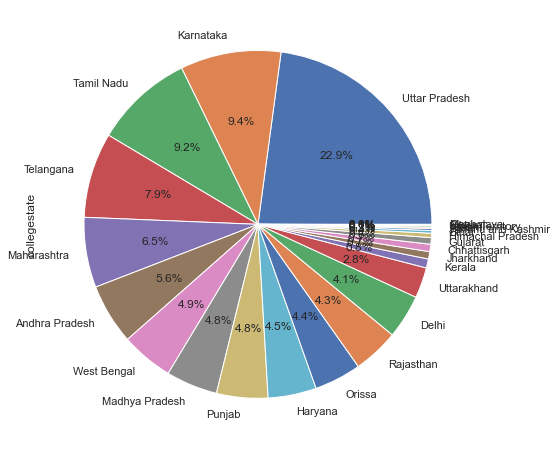

In [52]:
print(data['collegestate'].value_counts())    
plt.figure(figsize=(8,8))
data.collegestate.value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()                   

In [53]:
##  uttar pradesh stands first with 22.9%(902) state colleges and followed by karnataka with 9.4%(369) and remaining.

## salary

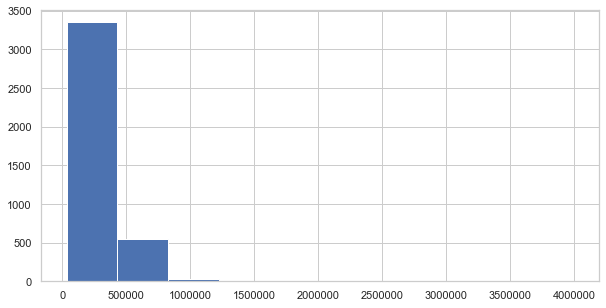

In [54]:
plt.figure(figsize = (10,5))
plt.hist(data['salary'],bins=10)
plt.ticklabel_format(style='plain')

In [55]:
## salary of the employes is around 0-5 lakhs is highest. 5 lakhs to 8lakhs is the second range of salary

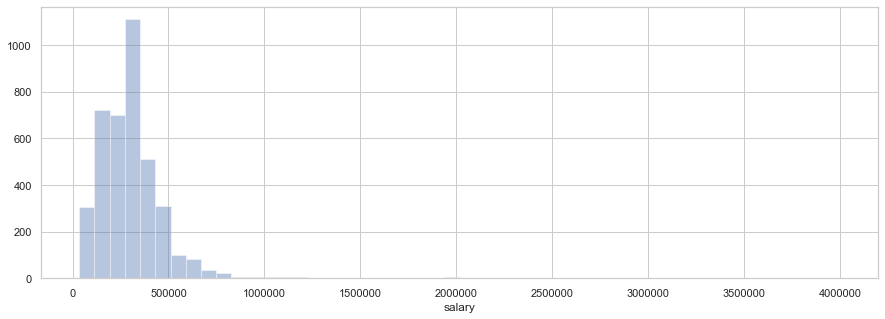

In [56]:
plt.figure(figsize=(15,5))
sns.distplot(data['salary'],kde=False)
plt.ticklabel_format(style='plain')
plt.show()

## college gpa

Text(0.5, 0, 'collegegpa')

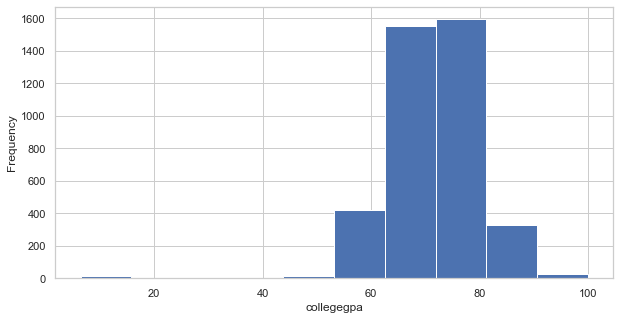

In [57]:
data['collegegpa'].plot(kind='hist', figsize=(10,5))
plt.xlabel('collegegpa')

In [58]:
## college gpa is varied between 0-100. In this graph it shows most of colleges are with gpa around 50-100.highest gpa is at 70-80 for a frequency of 1600

## 10 percentage

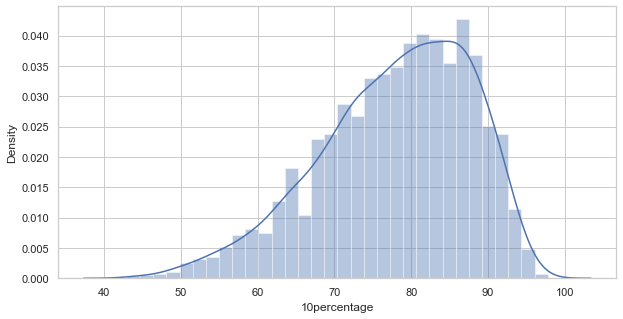


mean:  77.94655084960682
median: 79.2
mode: 0    78.0
dtype: float64


In [59]:
plt.figure(figsize=(10,5))
sns.distplot(data['10percentage'])
plt.show()
print()
print('mean: ',data['10percentage'].mean())
print('median:',data['10percentage'].median())
print('mode:',data['10percentage'].mode())


In [60]:
## this above graph is left skewed. mean is 77.9,median is 79.2,mode is 78.0 .10 percentage highest is at 90% with 0.045 density

## 12 graduation 

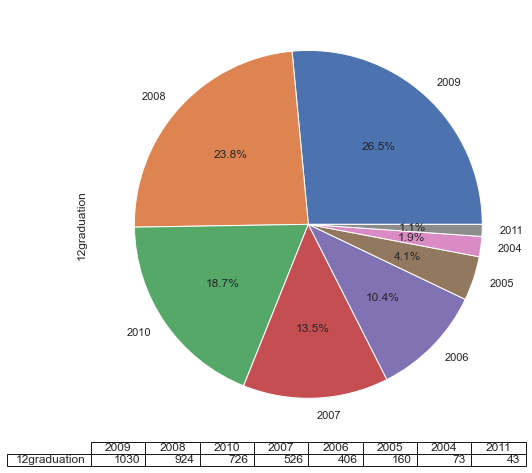

In [61]:
plt.figure(figsize=(8,8))
data['12graduation'].value_counts().iloc[:8].plot(kind='pie',table = True,autopct='%1.1f%%')
plt.show()

In [62]:
## this graph shows 12 graduation candidates in company from 2004-2011. In 2008 there was the highest 23.8% of 12 graduation candidates

## 12percentage

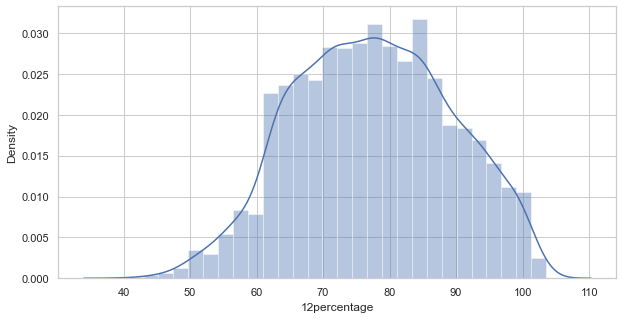



mean:  77.52561582099301
median: 77.44741484987517
mode: 72.73744911513701


In [63]:
plt.figure(figsize=(10,5))
transformed, _ = stats.boxcox(data['12percentage'])
plt.xlabel('12percentage')
#plot the distribution of the transformed data values
sns.distplot(transformed)
plt.show()
print()
print()
print('mean: ',transformed.mean())
print('median:',np.median(transformed))
print('mode:',st.mode(transformed))


In [64]:
## this is a boxcox  transformation here the graph is uniformly distributed. 12 perentage is high from 80-90% with 0.030and more density.

## graduation year

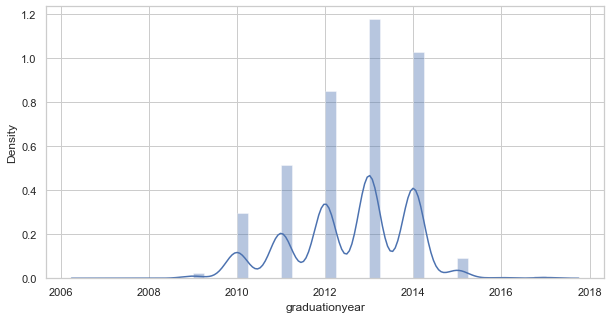


mean:  2012.5987826528024
median: 2013.0
mode: 0    2013.0
dtype: float64


In [65]:
plt.figure(figsize=(10,5))
sns.distplot(data['graduationyear'])
plt.show()
print()
print('mean: ',data['graduationyear'].mean())
print('median:',data['graduationyear'].median())
print('mode:',data['graduationyear'].mode())


In [66]:
## graduaion year plots represents median at 2013 with a density of 0.5.Yes 2013 year graduates are  highest in density

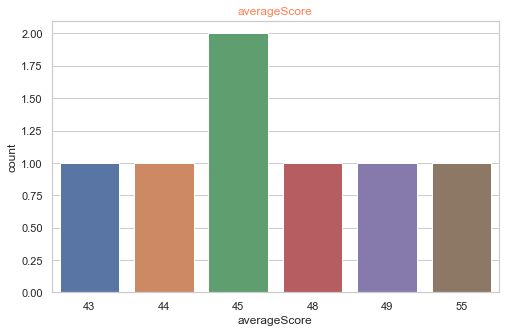

In [67]:
plt.figure(figsize=(8,5))
sns.countplot(data['averageScore'].value_counts().iloc[:7])
plt.title('averageScore',color='coral')
plt.show()



In [68]:
##data['averageScore']=(data['logical']+data['quant']+data['english'])/3.Average score is sum of logical,quant,english. so this graph represents  the count of average score 

## computer programming

<AxesSubplot:xlabel='computerprogramming'>

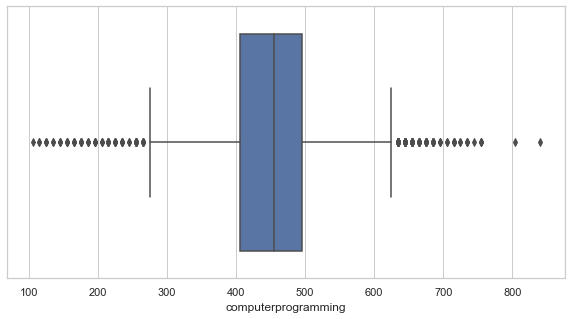

In [69]:
plt.figure(figsize=(10,5))
sns.boxplot(data['computerprogramming'])

In [70]:
## box plot representing the distribution of data for computer programming. median is at 455.the outlier >IQR+15 630 to 800 and >IQR-15-280-100

## computer science

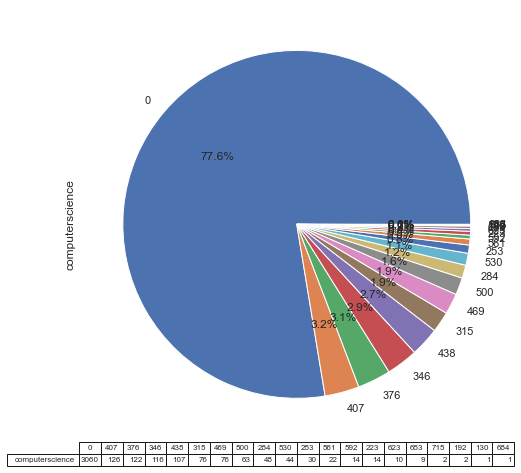

In [71]:
plt.figure(figsize=(8,8))
data.computerscience.value_counts().plot(kind='pie',table = True,autopct='%1.1f%%')
plt.show()

In [72]:
## computer science is having high demand around 77.6% is of computer science background

[  0 466 233 366 324 266 333 356 420 260 228 388 300 292 433 196 200 164
 400 484 500 452 516 166 533 566 612 133 548]


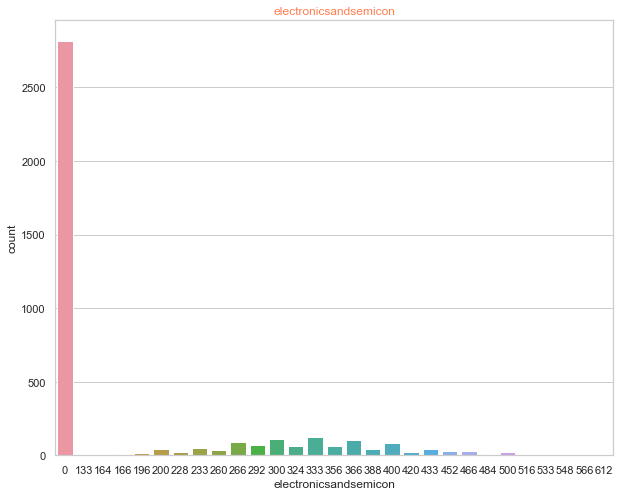

In [73]:
plt.figure(figsize=(10,8))
sns.countplot(data['electronicsandsemicon'])
plt.title('electronicsandsemicon',color='coral')
print(data['electronicsandsemicon'].unique())

In [74]:
## count of  this electronicsandsemicon is less than 200. I think it is around 100 count of electronicsandsemicon

## conscientiousness

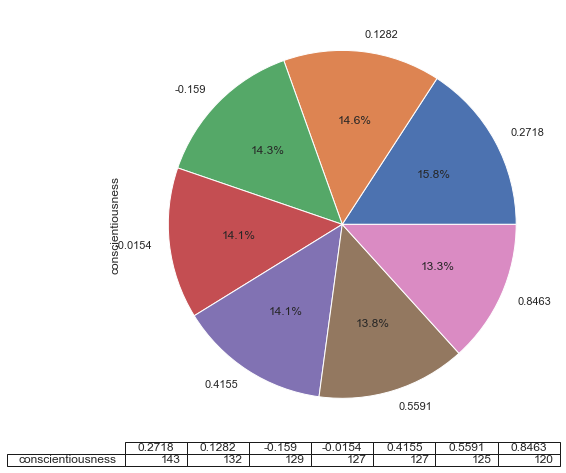

In [75]:
plt.figure(figsize=(8,8))
data.conscientiousness.value_counts().iloc[:7].plot(kind='pie',table = True,autopct='%1.1f%%')
plt.show()

## agreeableness

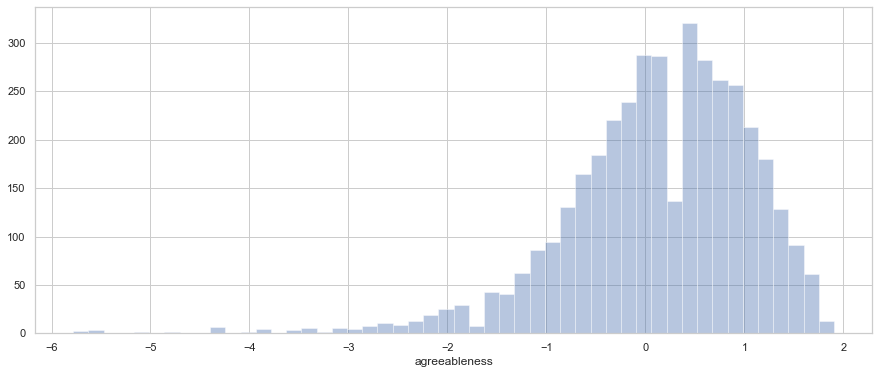

In [76]:
plt.figure(figsize=(15,6))
sns.distplot(data['agreeableness'],kde=False)
plt.show()


## extraversion

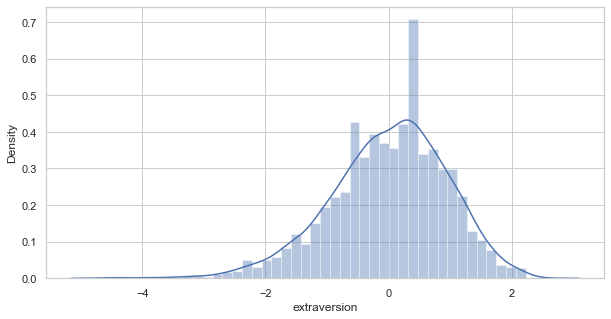

In [77]:
plt.figure(figsize=(10,5))
sns.distplot(data['extraversion'])
plt.show()

In [78]:
## this graph represents the extraversion. in this graph it is left skewed at almost -0.52. the median is at 0.09. This graph is negatively coorelated to density 

## nueroticism

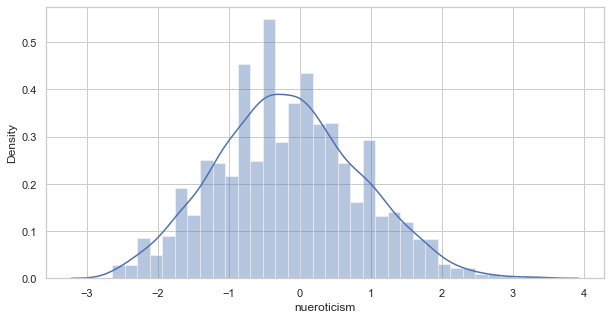

In [79]:
plt.figure(figsize=(10,5))
sns.distplot(data['nueroticism'])
plt.show()


In [80]:
## It is  right skewed at 0.16.normal distribution of nueroticism ith density is high at -0.02(median)

## openess_to_experience

No handles with labels found to put in legend.


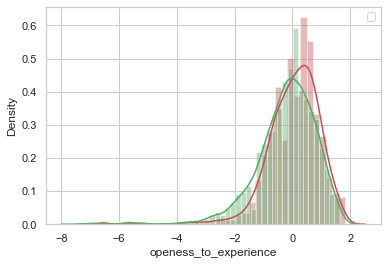

In [81]:
sns.distplot(data[data['gender']=='Female']['openess_to_experience'],color='r')
sns.distplot(data[data['gender']=='Male']['openess_to_experience'],color='g')
plt.legend()
plt.show()


In [82]:
## differenciation male and female with openess to experience

## bivariate analysis

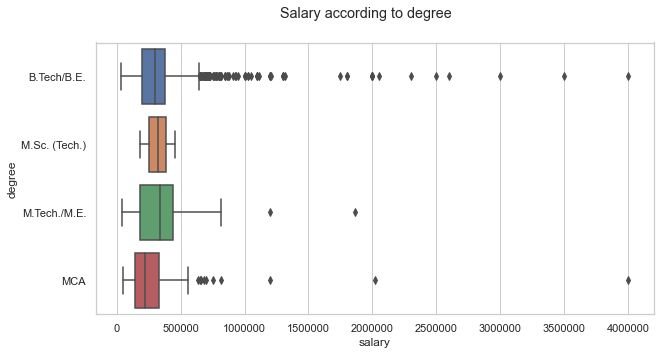

In [83]:
plt.figure(figsize=(10,5))
sns.boxplot(x='salary',y='degree',data=data)
plt.ticklabel_format(style='plain',axis='x')
plt.suptitle('Salary according to degree')
plt.show()

In [84]:
## btech students are getting high salary compared to others.Mtech/M.sc are getting average package high compared to others 

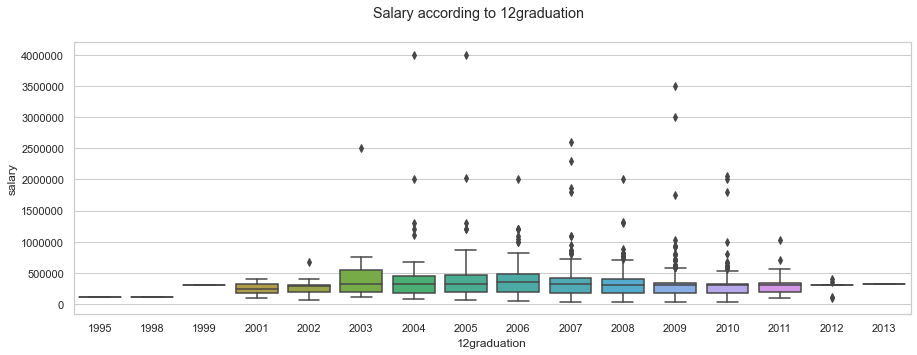

In [85]:
plt.figure(figsize=(15,5))
sns.boxplot(y='salary',x='12graduation',data=data)
plt.ticklabel_format(style='plain',axis='y')
plt.suptitle('Salary according to 12graduation')
plt.show()

In [86]:
## from the above box plot 2004,2005, 2006 of 12 graduation are normally distributed .I think these are getting high salaries compared to others candidates of 12 graduation passouts

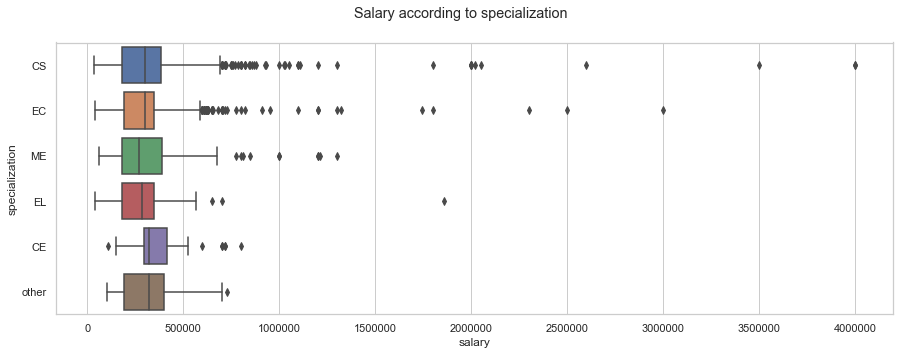

In [87]:
plt.figure(figsize=(15,5))
sns.boxplot(x='salary',y='specialization',data=data)
plt.ticklabel_format(style='plain',axis='x')
plt.suptitle('Salary according to specialization')
plt.show()


In [88]:
## above plot shows cs,ec are normally distributed compared to others. the range of salary is high for cs and ec. sometimes it is even 40 lks for cs and 30lks for ec. 

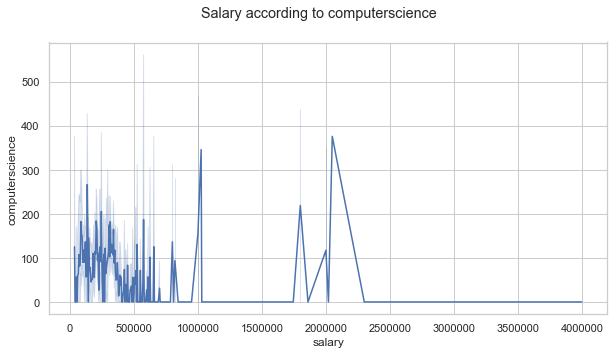

In [89]:

plt.figure(figsize=(10,5))
sns.lineplot(x = data['salary'], y = data['computerscience'])
plt.ticklabel_format(style='plain',axis='x')
plt.suptitle('Salary according to computerscience')
plt.show()


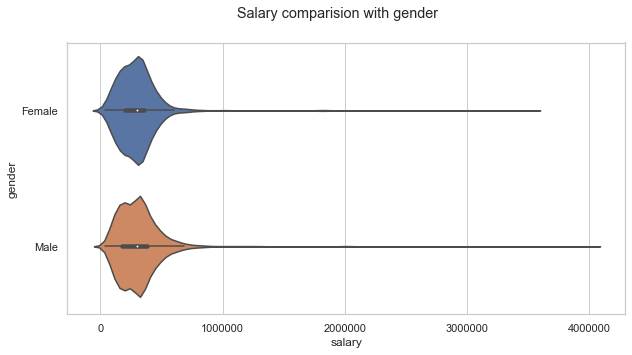

In [90]:

plt.figure(figsize=(10,5))
sns.violinplot(x = data['salary'], y = data['gender'])
plt.ticklabel_format(style='plain',axis='x')
plt.suptitle('Salary comparision with gender')
plt.show()


In [91]:
## above plot shows the salary comparision of male and female.We see that the overall shape and distribution of the salary are similar for both genders (quartiles very close to each other), but there are more outliers in the case of males upto 40lks .

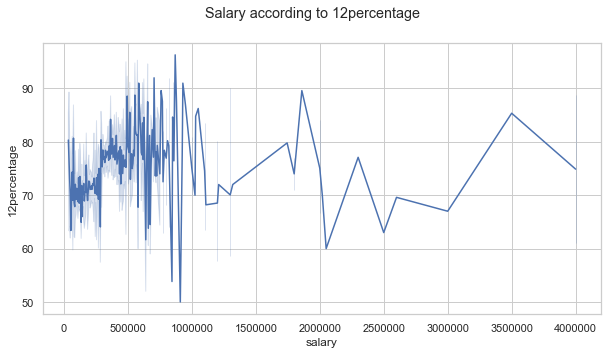

In [92]:
plt.figure(figsize=(10,5))
sns.lineplot(x = data['salary'], y = data['12percentage'])
plt.ticklabel_format(style='plain',axis='x')
plt.suptitle('Salary according to 12percentage')
plt.show()


In [93]:
## salary according to 12% shows that even if 60-90 there are cases that salary is upto 40lks.

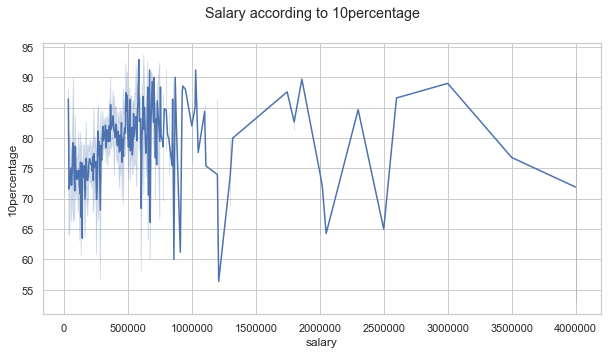

In [94]:
plt.figure(figsize=(10,5))
sns.lineplot(x = data['salary'], y = data['10percentage'])
plt.ticklabel_format(style='plain',axis='x')
plt.suptitle('Salary according to 10percentage')
plt.show()


<AxesSubplot:xlabel='quant', ylabel='logical'>

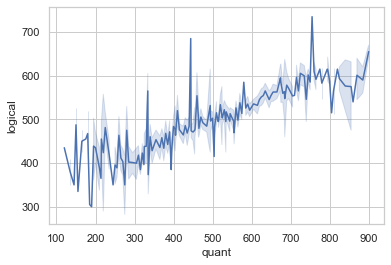

In [95]:
sns.lineplot(x = data['quant'], y = data['logical'])

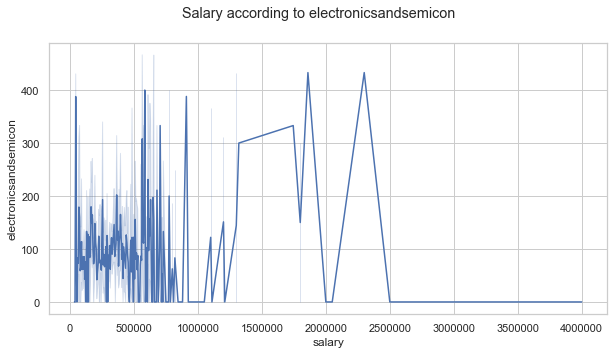

In [96]:
plt.figure(figsize=(10,5))
sns.lineplot(x = data['salary'], y = data['electronicsandsemicon'])
plt.ticklabel_format(style='plain',axis='x')
plt.suptitle('Salary according to electronicsandsemicon')
plt.show()


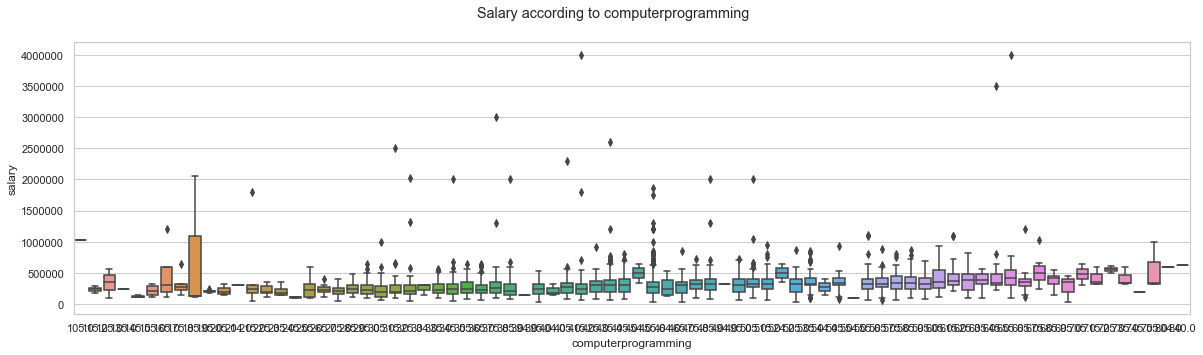

In [97]:
plt.figure(figsize=(20,5))
sns.boxplot(y='salary',x='computerprogramming',data=data)
plt.ticklabel_format(style='plain',axis='y')
plt.suptitle('Salary according to computerprogramming')
plt.show()

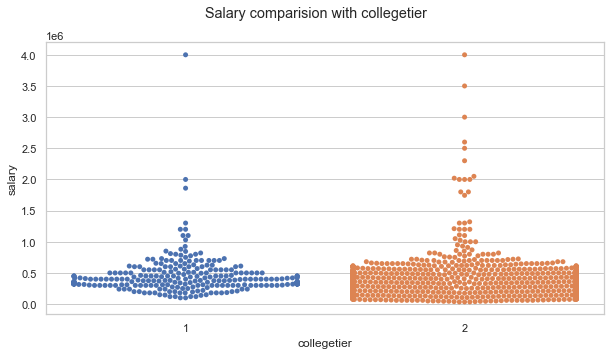

In [107]:
plt.figure(figsize=(10,5))
sns.swarmplot(y="salary", x="collegetier", data=data)
plt.suptitle('Salary comparision with collegetier')
plt.show()


<AxesSubplot:xlabel='logical', ylabel='salary'>

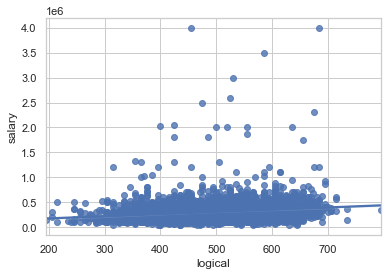

In [102]:
sns.regplot(x='logical', y='salary', data=data)

<AxesSubplot:xlabel='averageScore', ylabel='salary'>

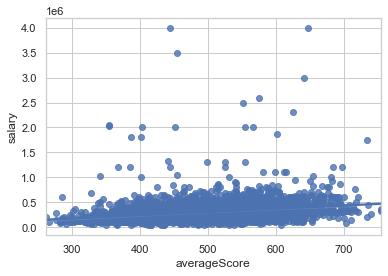

In [104]:
sns.regplot(x='averageScore', y='salary', data=data)

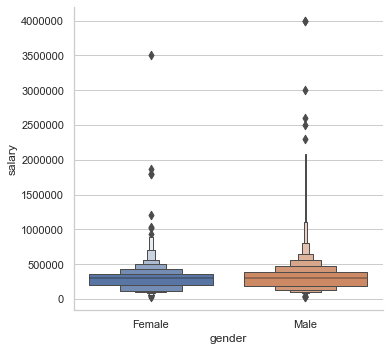

In [109]:
sns.catplot(x="gender", y="salary", kind="boxen",data=data)
plt.ticklabel_format(style='plain',axis='y')
plt.show()

<AxesSubplot:>

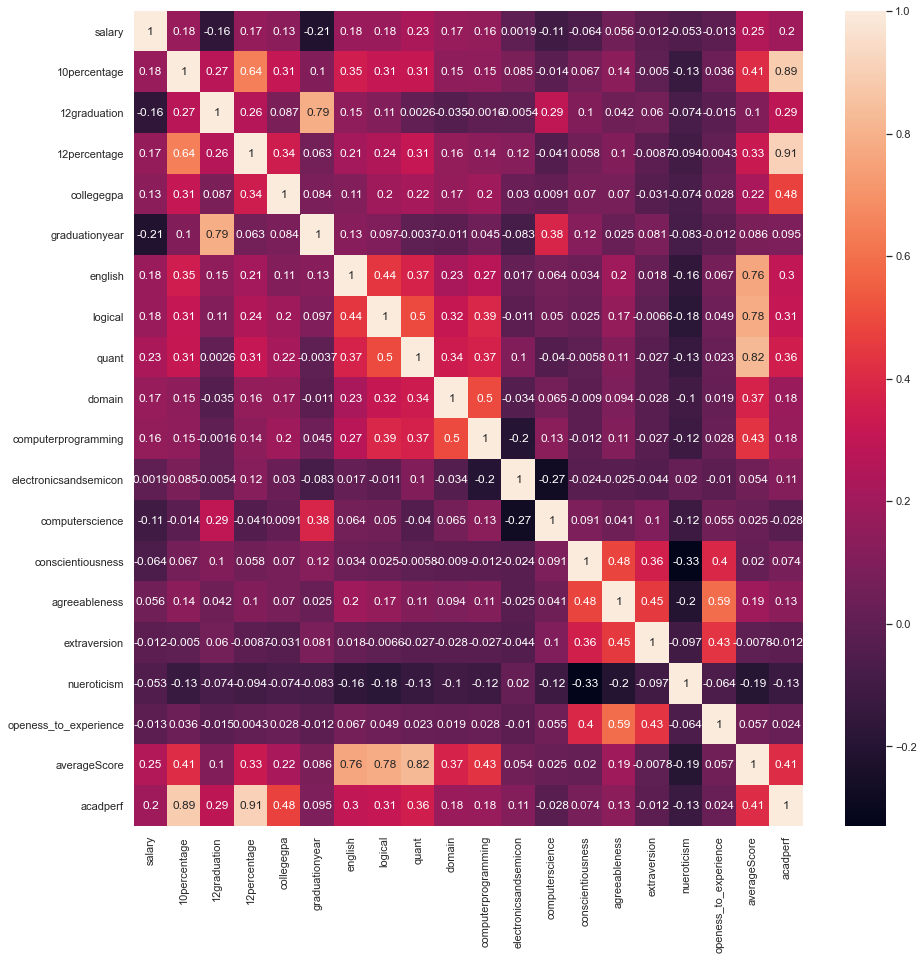

In [111]:
plt.figure(figsize=(15,15))
corrMatrix1 = data.corr()
sns.heatmap(corrMatrix1, annot=True)

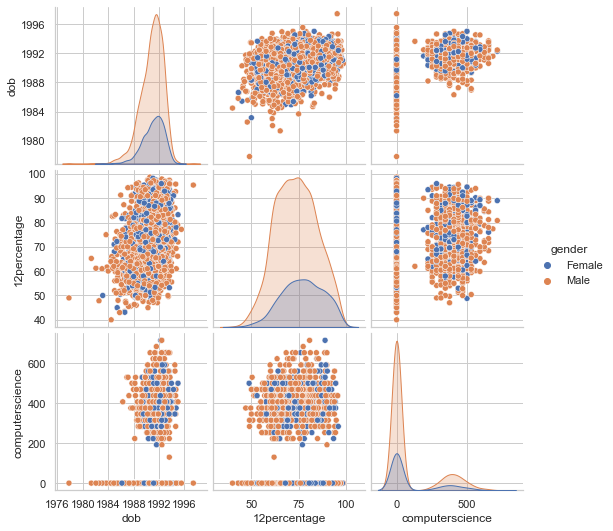

In [134]:
sns.pairplot(data=data, vars=['dob','12percentage','computerscience'],hue='gender',kind='scatter')
plt.show()

<Figure size 1080x864 with 0 Axes>

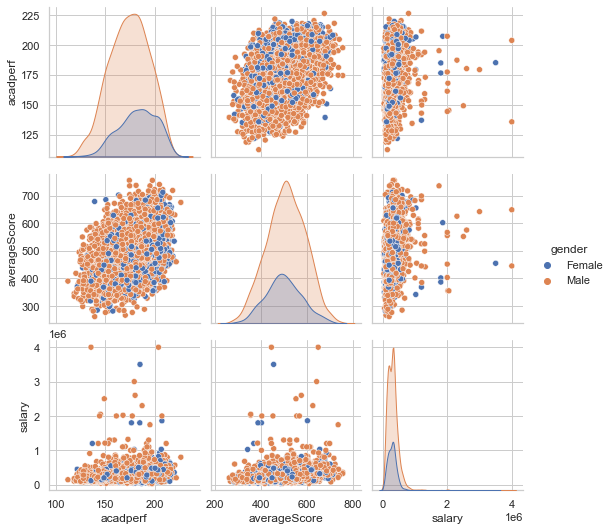

In [142]:
plt.figure(figsize=(15,12))
sns.pairplot(data=data, vars=['acadperf','averageScore','salary'],hue='gender',kind='scatter')
plt.show()